Importing

In [184]:
#importing files & data loading
from google.colab import files
uploaded = files.upload()


Saving mcdonalds.csv to mcdonalds (7).csv


In [185]:
import pandas as pd
import numpy as np
df = pd.read_csv('mcdonalds.csv')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


Libraries

In [186]:
#importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import linkage, dendrogram
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.impute import SimpleImputer


#Initial Data Exploration

print(df.head(3))
print(df.shape)
print(df.info())
print(df.describe())
print(df.isnull().sum())
print(df.columns)


  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
(1453, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   obje

In [187]:
#Data Transformation

df_x = (df.iloc[:, 1:12] == "Yes").astype(int)
print(pd.isnull(df).sum())

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [188]:
#Column-wise Analysis
df['Like'].value_counts()


,count
Like,
+3,229
+2,187
0,169
+4,160
+1,152
I hate it!-5,152
I love it!+5,143
-3,73
-4,71


In [189]:
df['yummy'].value_counts()

,count
yummy,
Yes,803
No,650


In [190]:
df['Like']= df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
print(df_x.mean().round(2))


convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
Like          0.00
dtype: float64


In [191]:
# pulling necessary data from dataset
MD_x = df.iloc[:, 0:11]
MD_x = (MD_x == "Yes").astype(int)
columnMeans = np.round(MD_x.mean(), 2)
columnHeadings = df.columns
result = dict(zip(columnHeadings, columnMeans))
print(result)


{'yummy': 0.55, 'convenient': 0.91, 'spicy': 0.09, 'fattening': 0.87, 'greasy': 0.53, 'fast': 0.9, 'cheap': 0.6, 'tasty': 0.64, 'expensive': 0.36, 'healthy': 0.2, 'disgusting': 0.24}


[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]


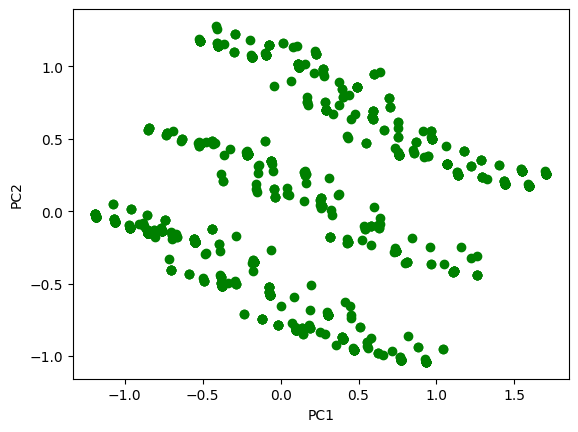

In [192]:
#Principal Component Analysis (PCA) for Data Visualization
pca = PCA()
MD_pca = pca.fit(MD_x)
print(pca.explained_variance_ratio_)

plt.scatter(pca.transform(MD_x)[:, 0], pca.transform(MD_x)[:, 1], c='green')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [193]:
import warnings
warnings.filterwarnings('ignore')

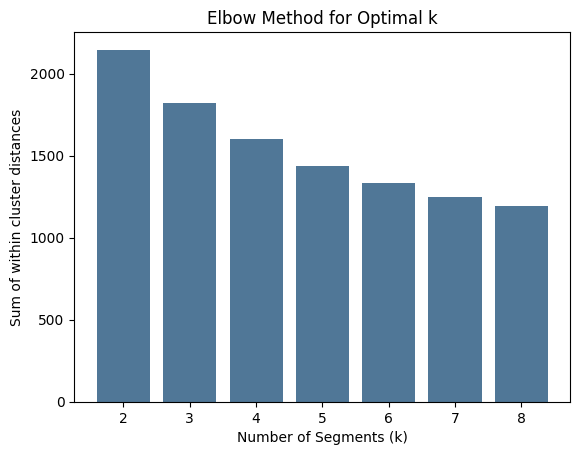

In [194]:
#K-Means Clustering - Elbow Method
k_values = range(2, 9)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    inertia_values.append(kmeans.inertia_)
plt.bar(k_values, inertia_values, color='#063e6b', alpha=0.7)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Segments (k)')
plt.ylabel('Sum of within cluster distances')
plt.show()

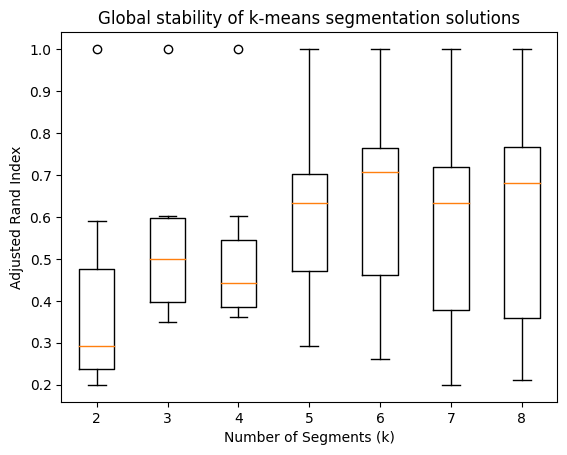

In [195]:
# K-Means Clustering with Stability Analysis:
results = {}
for k in range(2, 9):
    kmeans_model = KMeans(n_clusters=k, n_init=10, random_state=2130)
    kmeans_labels = kmeans_model.fit_predict(MD_x)
    results[str(k)] = kmeans_labels
    df['Cluster Number'] = kmeans_labels

# Calculating adjusted rand index for every k value
ari_values = []
for k1 in range(2, 9):
    ari_values.append([adjusted_rand_score(results[str(k1)], results[str(k2)]) for k2 in range(2, 9)])

# Conversion of ari_values to a NumPy array for easy plotting
ari_values = np.array(ari_values)

# Creating a box plot
plt.boxplot(ari_values.T, labels=list(range(2, 9)))
plt.xlabel('Number of Segments (k)')
plt.ylabel('Adjusted Rand Index')
plt.title('Global stability of k-means segmentation solutions')
plt.show()

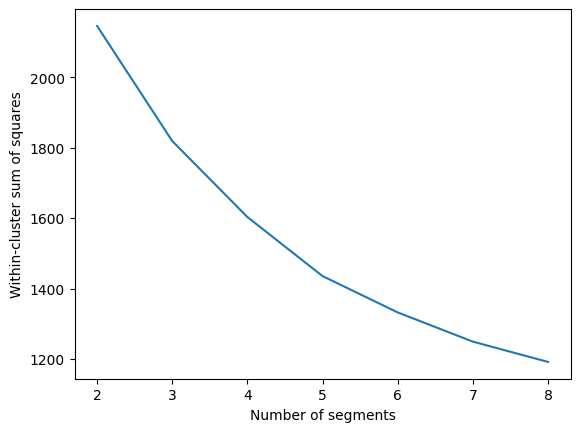

In [196]:
#Optimal Clusters Visualization
kmeans_models = [KMeans(n_clusters=k, n_init=10, random_state=1234).fit(MD_x) for k in range(2, 9)]
wcss = [model.inertia_ for model in kmeans_models]
plt.plot(range(2, 9), wcss)
plt.xlabel("Number of segments")
plt.ylabel("Within-cluster sum of squares")
plt.show()

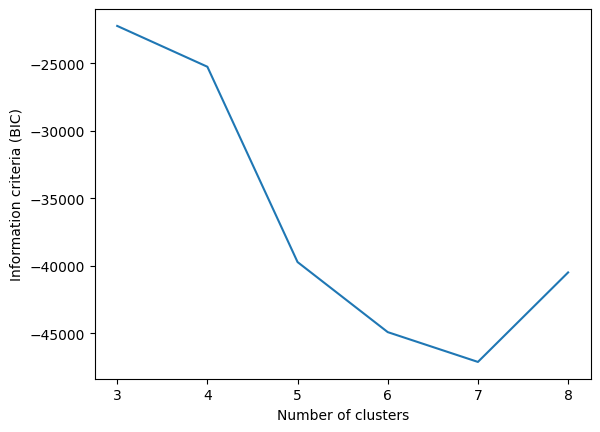

In [197]:
#Gaussian Mixture Model (GMM) Clustering and Information Criteria
gmm_models = [GaussianMixture(n_components=k, random_state=2130).fit(MD_x) for k in range(3, 9)]
bic = [model.bic(MD_x) for model in gmm_models]
plt.plot(range(3, 9), bic, label='BIC')
plt.xlabel("Number of clusters")
plt.ylabel("Information criteria (BIC)")
plt.show()

In [198]:
columns = ["iter", "converged", "k", "k0", "logLik", "AIC", "BIC"]
results = pd.DataFrame(columns=columns)
X = np.array(MD_x)
for k in range(2, 9):
    lca_model = GaussianMixture(n_components=k, n_init=10, random_state=1234)
    lca_model.fit(X)

    # Get log-likelihood and other metrics
    log_likelihood = lca_model.score(X)
    aic = lca_model.aic(X)
    bic = lca_model.bic(X)


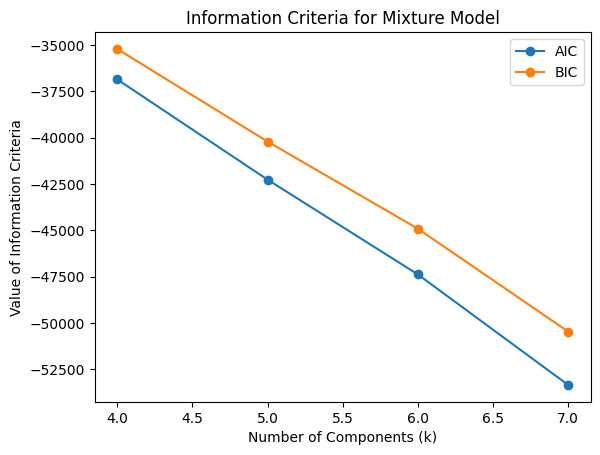

In [199]:
aicValues = []
bicValues = []

for k in range(4, 8):
    model = GaussianMixture(n_components=k, n_init=10, random_state=2130)
    model.fit(MD_x)
    aicValues.append(model.aic(MD_x))
    bicValues.append(model.bic(MD_x))

plt.plot(range(4, 8), aicValues, label='AIC', marker='o')
plt.plot(range(4, 8), bicValues, label='BIC', marker='o')
plt.xlabel('Number of Components (k)')
plt.ylabel('Value of Information Criteria')
plt.legend()
plt.title('Information Criteria for Mixture Model')
plt.show()

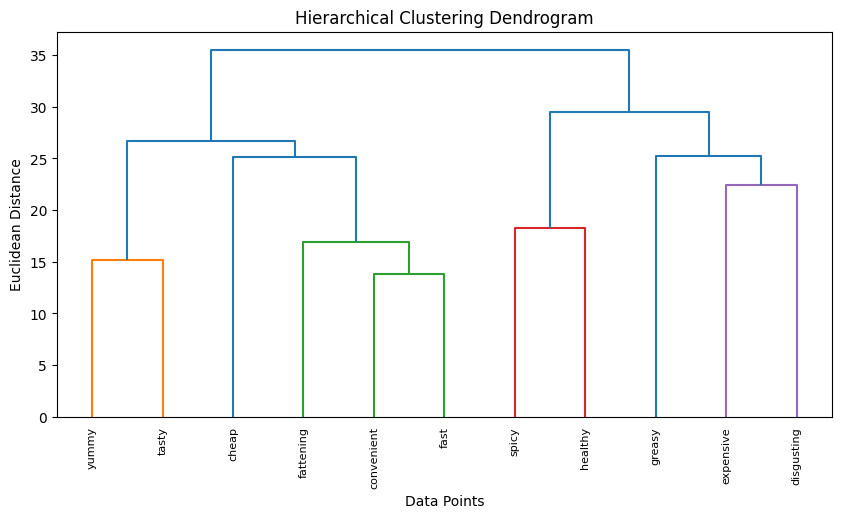

In [200]:
#Hierarchical Clustering and Dendrogram Visualization
MD_vclust = linkage(MD_x.transpose(), method='complete')

# Creating a dendrogram to visualize the hierarchical clustering
plt.figure(figsize=(10, 5))
dendrogram(MD_vclust, labels=MD_x.columns, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

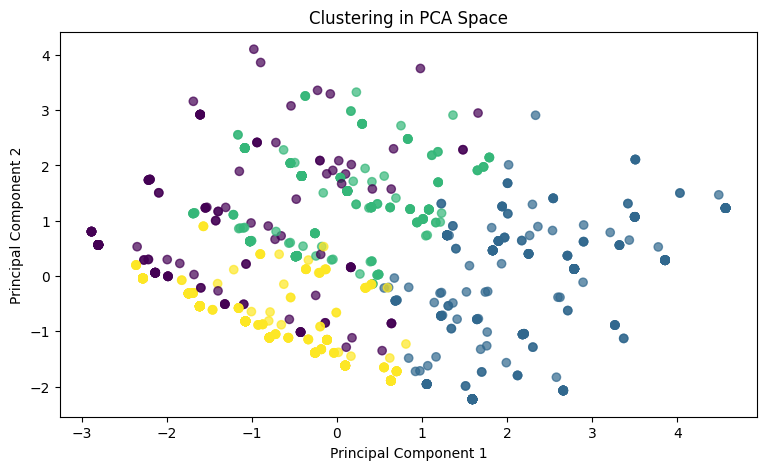

[[-0.40695508 -0.30882741 -0.02332033  0.17786071  0.26779582 -0.21303906
  -0.28913434 -0.42611499  0.29094445 -0.26683857  0.41074387]
 [ 0.28261487 -0.04568172  0.0699822  -0.20559024 -0.13630029 -0.28244059
  -0.57503178  0.24219851  0.56752776  0.20103082 -0.14388846]]


In [201]:
#Data Standardization and PCA Visualization
scaler = StandardScaler()
MD_x_standardized = scaler.fit_transform(MD_x)

# Perform PCA
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x_standardized)

# Perform clustering (KMeans with k=4 for illustration)
kmeansModel = KMeans(n_clusters=4, random_state=1234)
MD_k4 = kmeansModel.fit_predict(MD_x_standardized)

# Visualize clustering in PCA space
plt.figure(figsize=(9, 5))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=MD_k4, cmap='viridis', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Clustering in PCA Space")
plt.show()

# Project axes (MD.pca)
print(pca.components_)

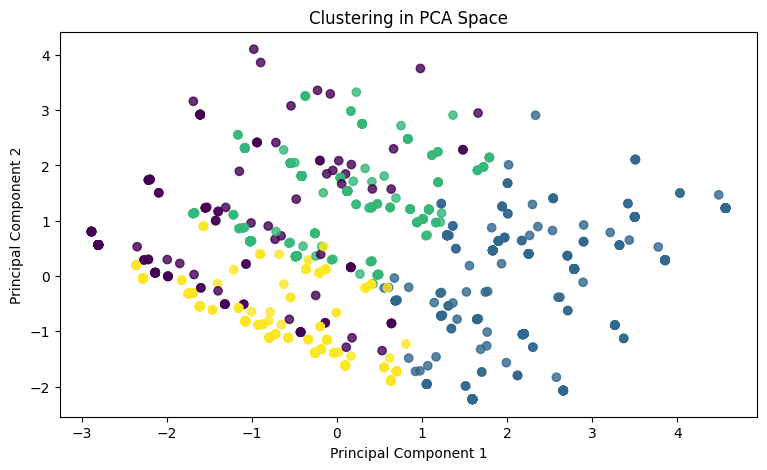

[[-0.40695508 -0.30882741 -0.02332033  0.17786071  0.26779582 -0.21303906
  -0.28913434 -0.42611499  0.29094445 -0.26683857  0.41074387]
 [ 0.28261487 -0.04568172  0.0699822  -0.20559024 -0.13630029 -0.28244059
  -0.57503178  0.24219851  0.56752776  0.20103082 -0.14388846]]


In [202]:
# Standardize the data
scaler = StandardScaler()
MD_x_standardized = scaler.fit_transform(MD_x)

# Perform PCA
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x_standardized)

# Perform clustering (KMeans with k=4 for illustration)
kmeansModel = KMeans(n_clusters=4, random_state=1234)
MD_k4 = kmeansModel.fit_predict(MD_x_standardized)

# Visualize clustering in PCA space
plt.figure(figsize=(9, 5))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=MD_k4, cmap='viridis', alpha=0.8)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Clustering in PCA Space")
plt.show()

# Project axes (MD.pca)
print(pca.components_)

In [203]:
crosstab =pd.crosstab(df['Cluster Number'],df['Like'])
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab
#mosaic(crosstab.stack(), title='Association between Segment Membership and Loving/Hating McDonald\'s\n')
#plt.show()



Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
Cluster Number,,,,,,,,,,,
0,3,3,4,8,16,28,38,51,49,48,42
1,22,3,9,11,7,23,18,9,11,5,1
2,4,2,5,4,3,23,24,41,55,30,27
3,8,16,16,13,14,26,15,21,7,1,0
4,58,22,21,11,4,14,7,6,1,0,0
5,0,0,1,1,1,6,9,15,29,29,36
6,2,3,1,1,4,26,36,40,73,47,37
7,55,22,16,10,9,23,5,4,4,0,0


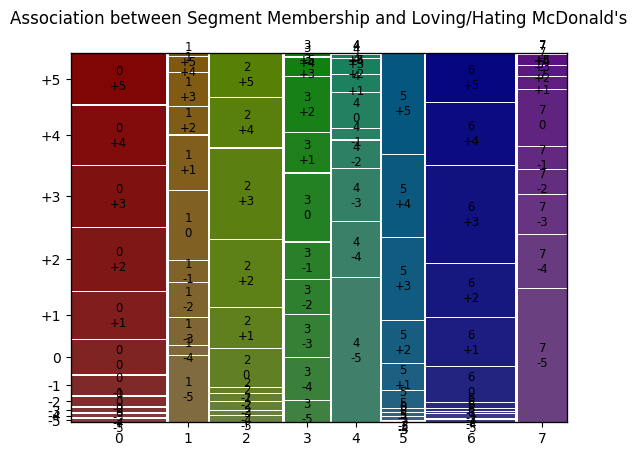

In [204]:
#Segment Membership Analysis
mosaic(crosstab.stack(), title='Association between Segment Membership and Loving/Hating McDonald\'s\n')
plt.show()

In [205]:
#Cluster Analysis and Demographic Insights
np.random.seed(2130)
MD_x = df  # Example data
kmeans_4 = KMeans(n_clusters=4, random_state=1234)
kmeans_4.fit(df_x)
cluster_labels = kmeans_4.labels_

mcdonalds = pd.DataFrame({
    'Segment': cluster_labels,
    'Like': np.random.choice([0, 1], size=MD_x.shape[0]),  # 0 or 1 for Like
    'Gender': np.random.choice(['Male', 'Female'], size=MD_x.shape[0]),
    'VisitFrequency': np.random.randint(1, 10, size=MD_x.shape[0])
})

# Calculate mean values for each segment
visit = mcdonalds.groupby('Segment')['VisitFrequency'].mean()
like = mcdonalds.groupby('Segment')['Like'].mean()
female = mcdonalds.groupby('Segment')['Gender'].apply(lambda x: (x == 'Female').mean())

print('Visit Frequency by Segment:', visit)
print('Like by Segment:', like)
print('Female Proportion by Segment:', female)

Visit Frequency by Segment: Segment
0    5.118681
1    4.538813
2    5.065625
3    5.034858
Name: VisitFrequency, dtype: float64
Like by Segment: Segment
0    0.509890
1    0.493151
2    0.487500
3    0.479303
Name: Like, dtype: float64
Female Proportion by Segment: Segment
0    0.474725
1    0.452055
2    0.503125
3    0.525054
Name: Gender, dtype: float64


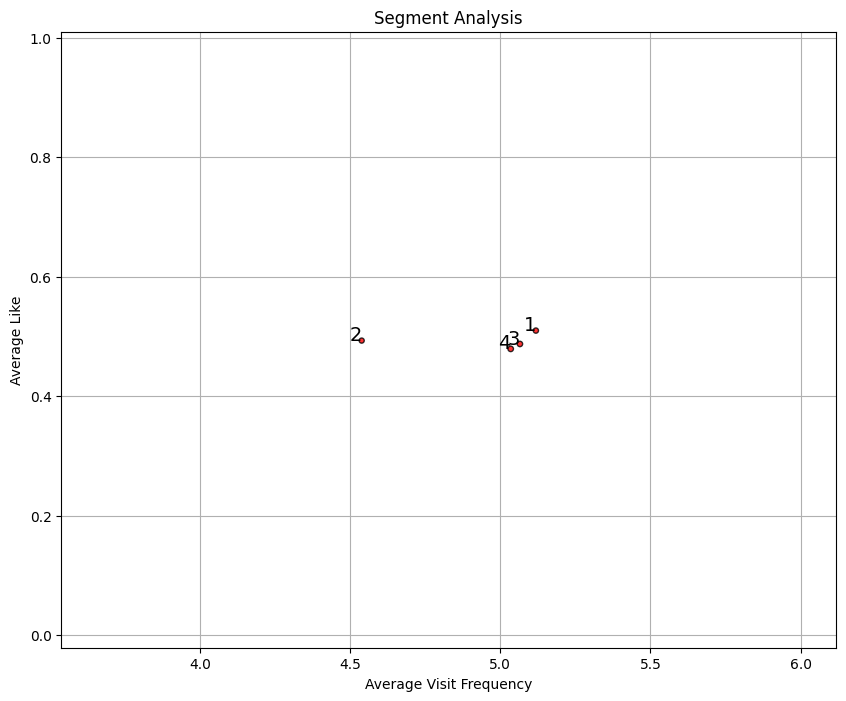

In [206]:
# Plot
plt.figure(figsize=(10, 8))
plt.scatter(visit, like, s=30 * female, alpha=0.8, c='red', edgecolor='black')

# Annotate points with segment numbers
for segment in visit.index:
    plt.text(visit[segment], like[segment], str(segment + 1), fontsize=14, ha='right')

plt.xlabel('Average Visit Frequency')
plt.ylabel('Average Like')
plt.xlim(visit.min() - 1, visit.max() + 1)  # Adjust limits as needed
plt.ylim(like.min() - 0.5, like.max() + 0.5)  # Adjust limits as needed
plt.title('Segment Analysis')
plt.grid(True)
plt.show()